In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rains = pd.read_csv('../data/weatherAUS.csv')
rains['Date'] = pd.to_datetime(rains['Date'])
# Extract the month and year from the 'Date' column
rains['Year'] = rains['Date'].dt.year
rains['Month'] = rains['Date'].dt.month

rains['RainTomorrow'] = rains['RainTomorrow'].map(lambda r: 1 if r == 'Yes' else 0, na_action='ignore')

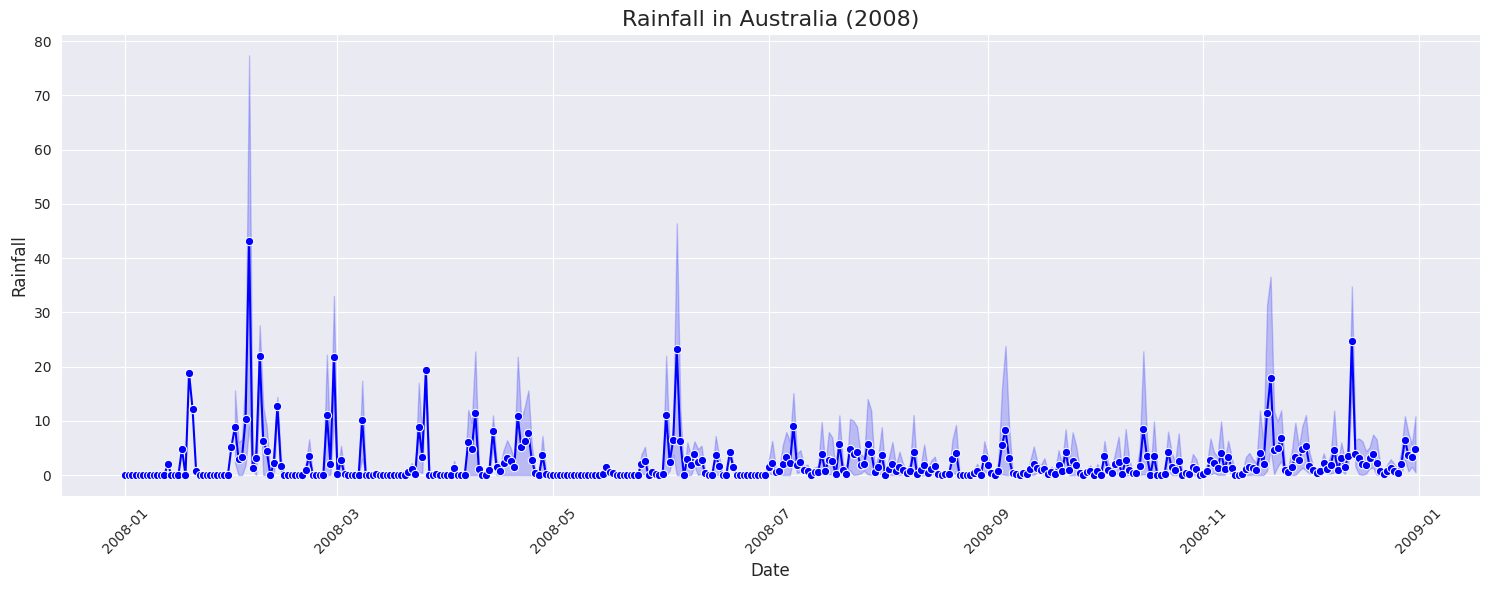

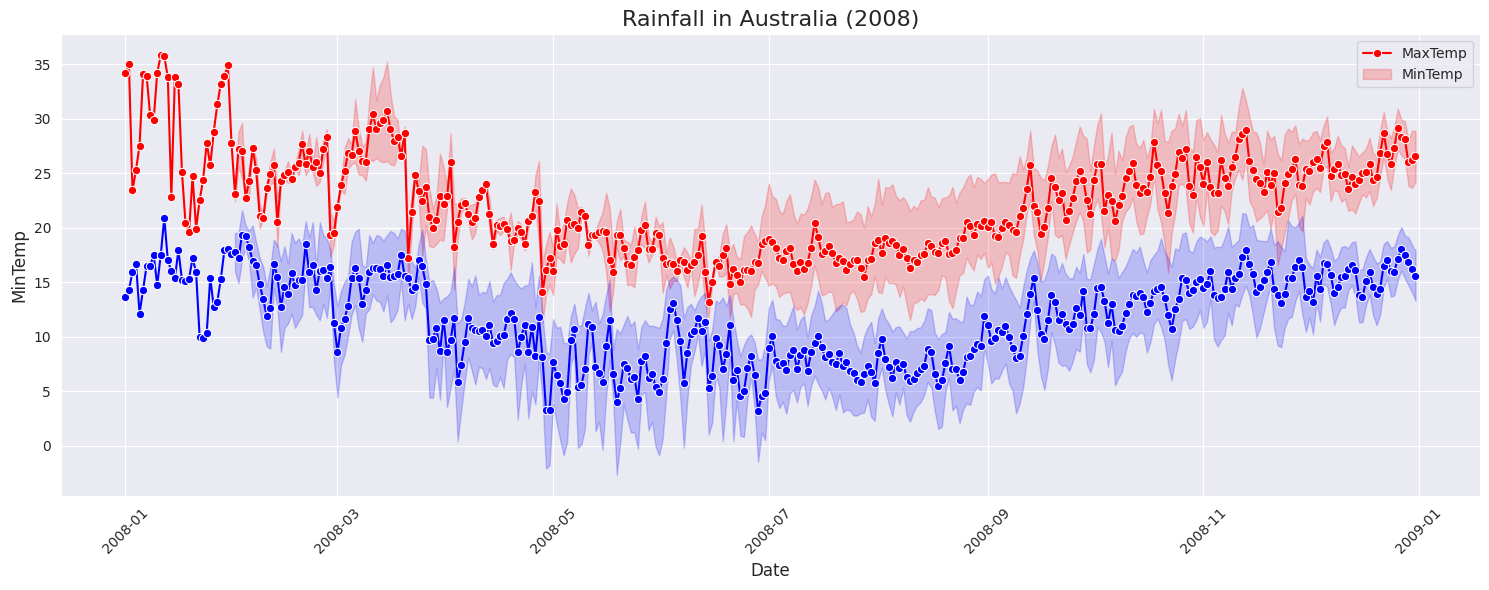

In [3]:
def plot_series(df, column, year, color='b'):
    first_year = rains[rains['Date'].dt.year == year]

    # Create a line plot of 'Rainfall' over time
    sns.lineplot(x='Date', y=column, data=first_year, marker='o', color=color)

    # Customize the plot
    plt.title(f'Rainfall in Australia ({year})', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)  # Add grid

    # Show the plot


plt.figure(figsize=(15, 6))
plot_series(rains, 'Rainfall', 2008)
plt.show()
plt.figure(figsize=(15, 6))
plot_series(rains, 'MaxTemp', 2008, color='r')
plot_series(rains, 'MinTemp', 2008, color='b')
plt.legend(['MaxTemp', 'MinTemp'])
plt.show()


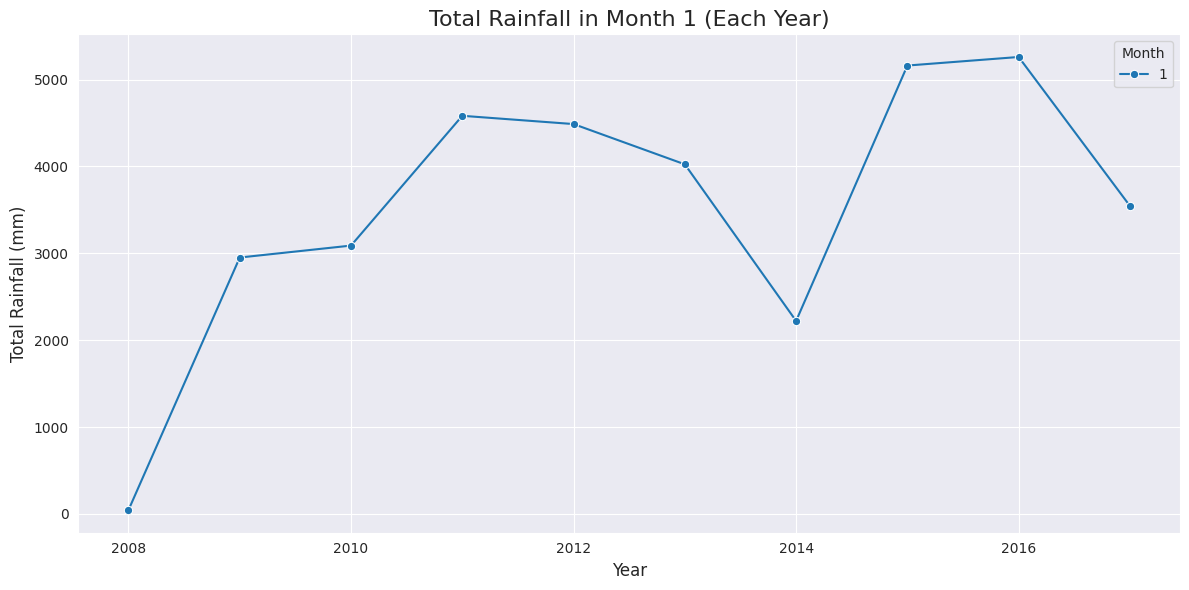

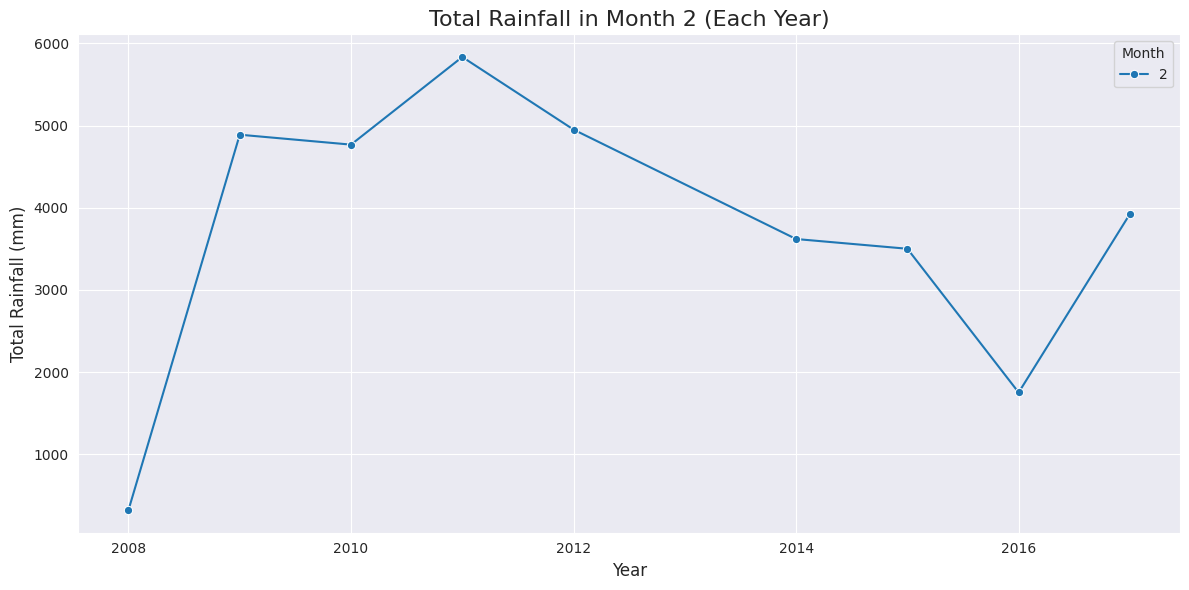

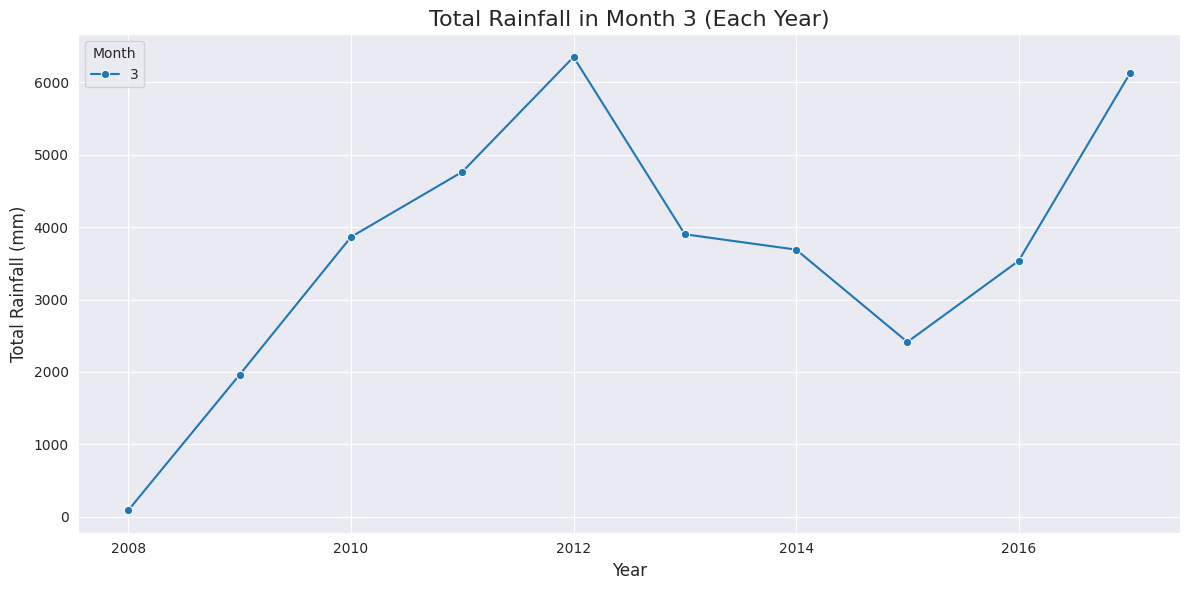

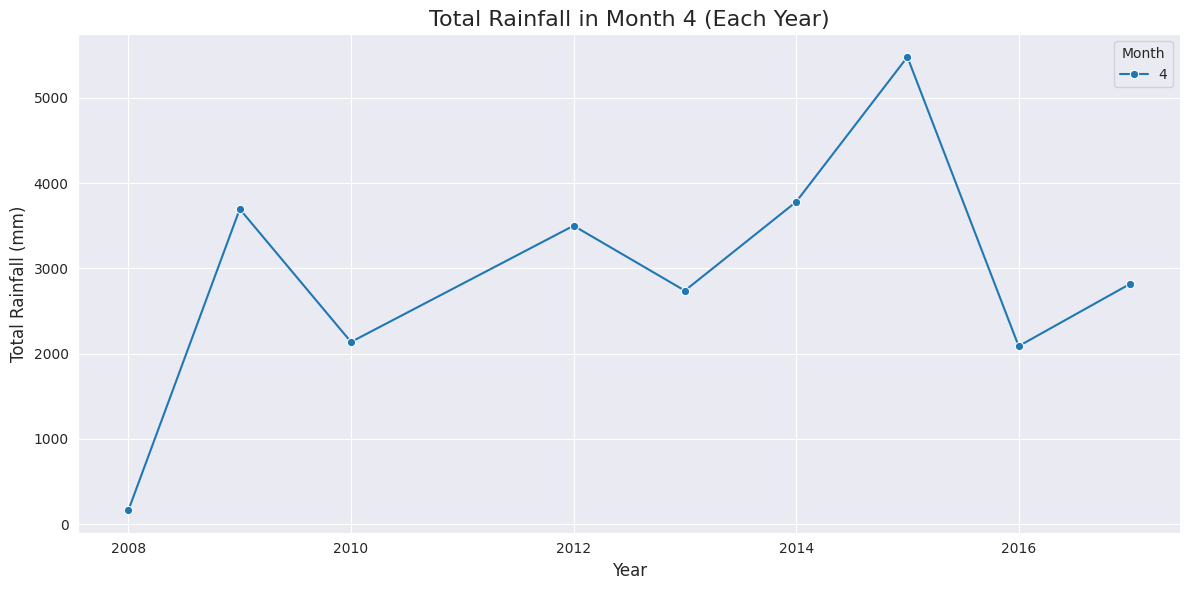

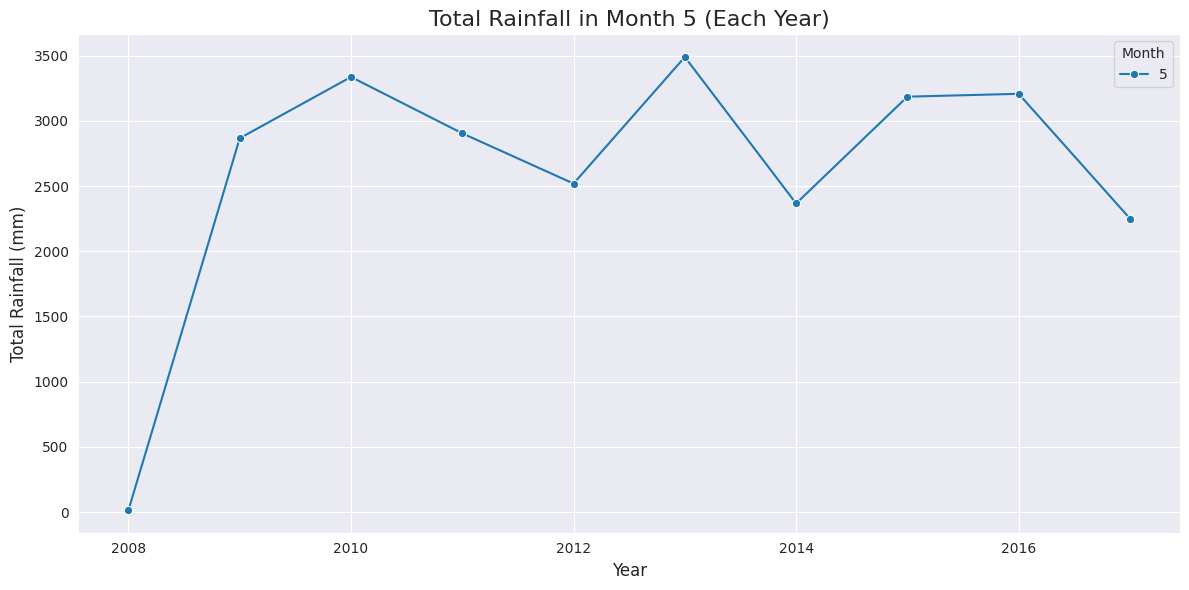

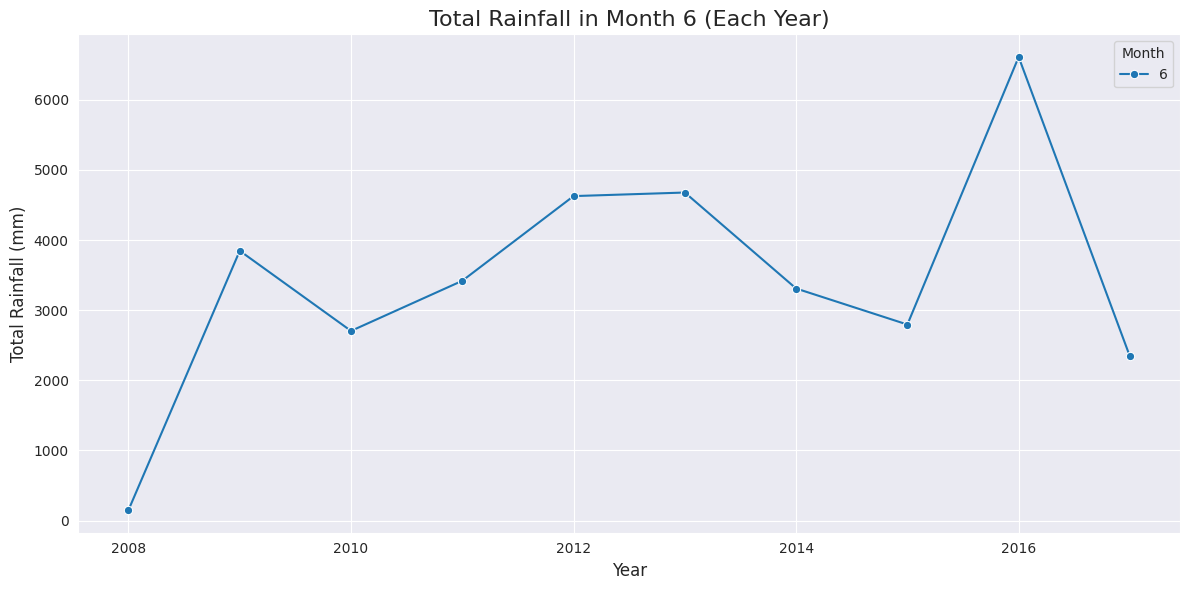

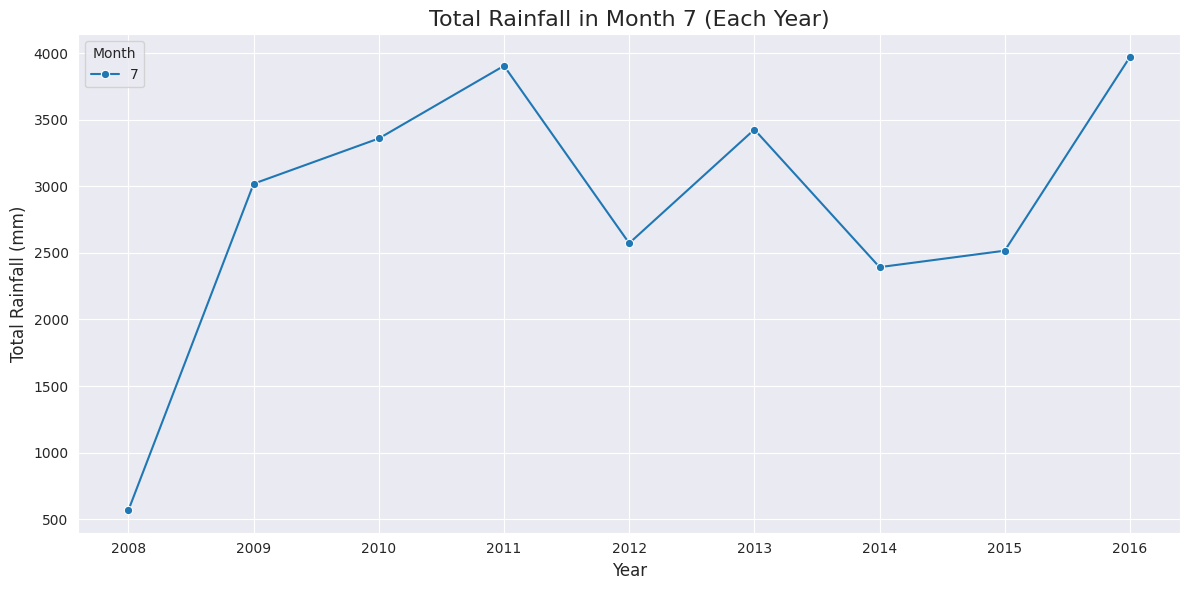

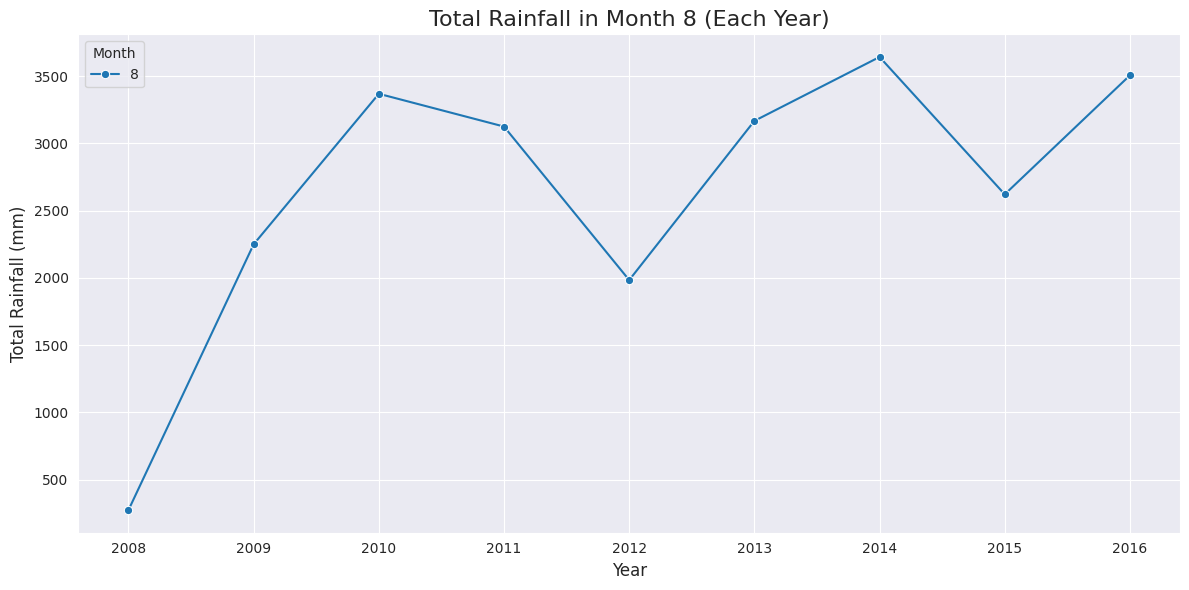

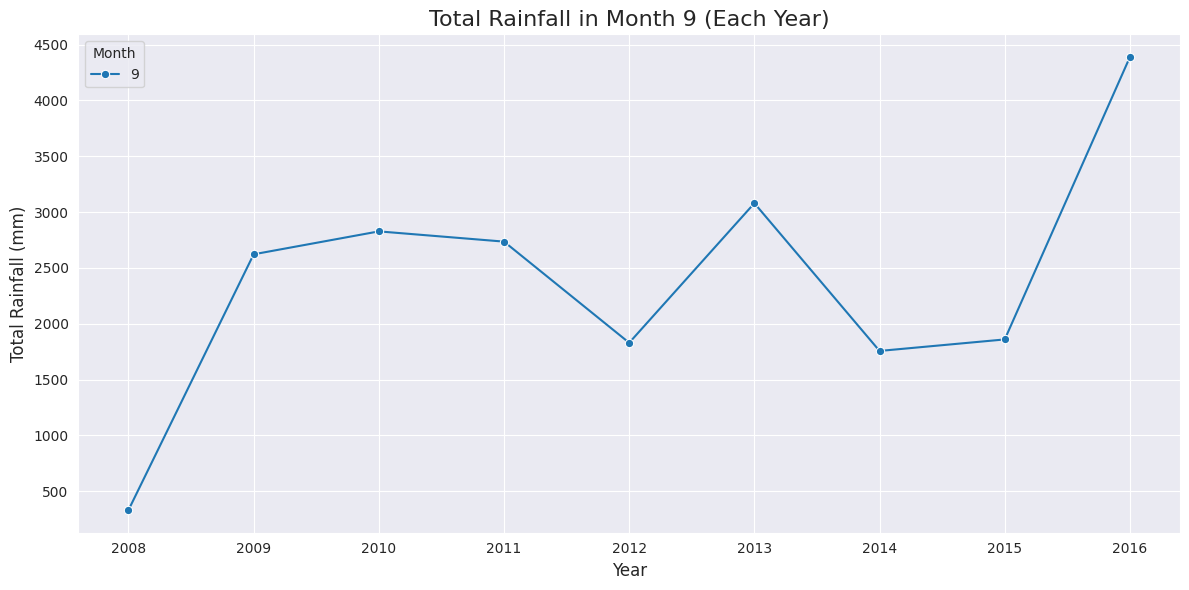

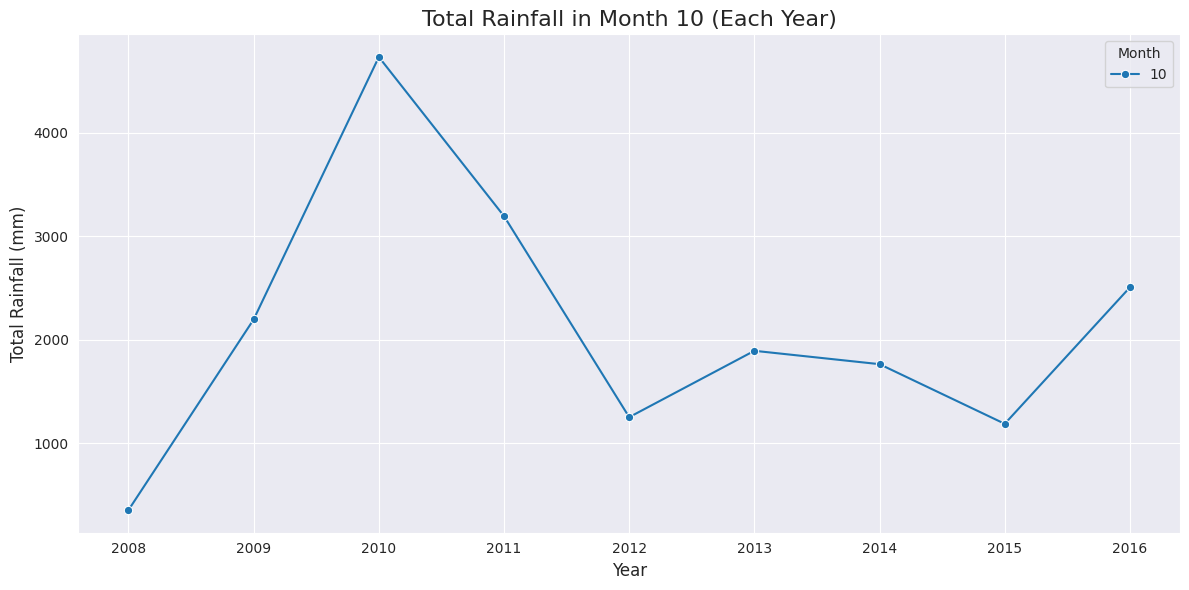

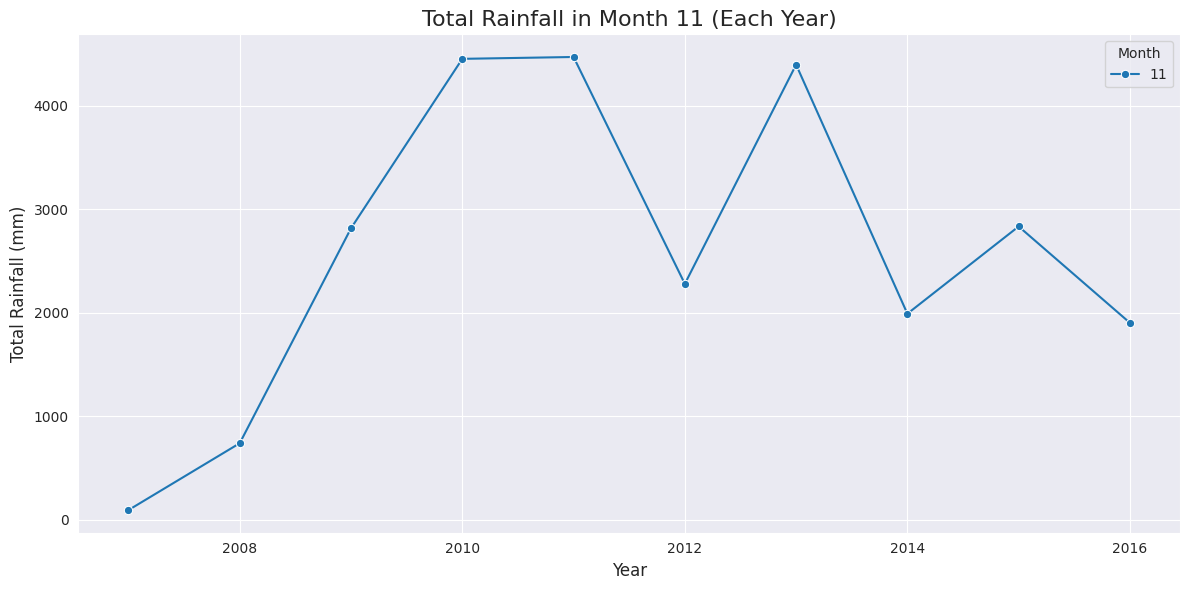

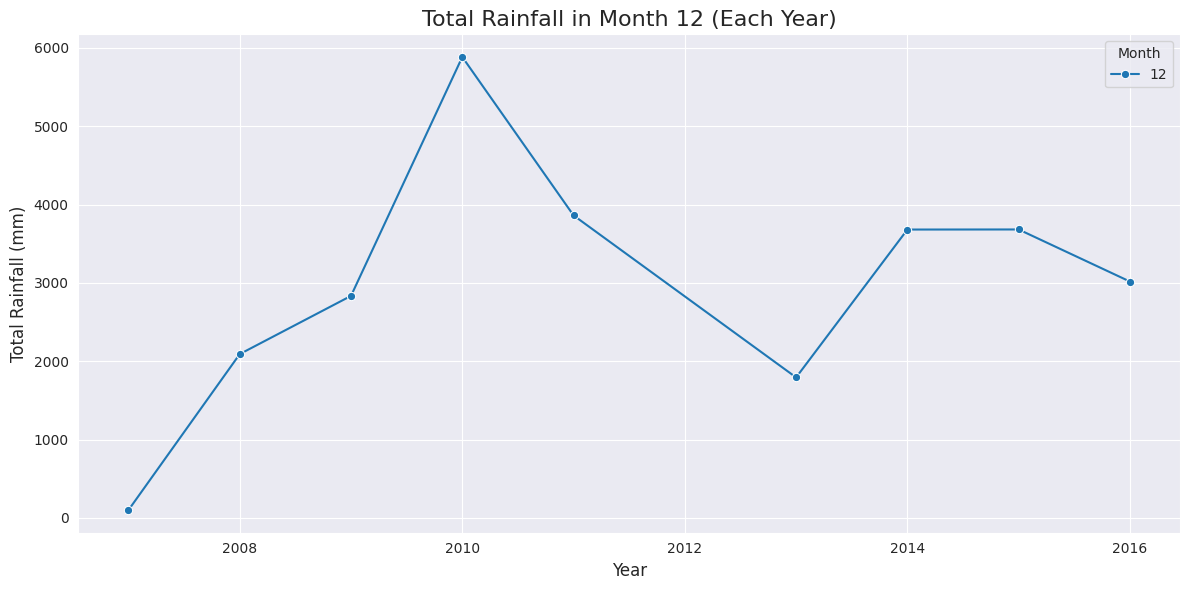

In [4]:
def total_rains_by_month_line(df, month):
    df_month = df[df['Date'].dt.month == month]

    # Group by year and calculate the total rainfall for each December
    total_rain_month = df_month.groupby(df_month['Date'].dt.year)['Rainfall'].sum().reset_index()

    # Create a line plot of the total rainfall for each December
    sns.lineplot(x='Date', y='Rainfall', data=total_rain_month, marker='o', label=f'{month}')

    # Customize the plot
    plt.title(f'Total Rainfall in Month {month} (Each Year)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total Rainfall (mm)', fontsize=12)
    plt.legend(title='Month')
    # Show the plot
    plt.tight_layout()


for i in range(1, 13):
    plt.figure(figsize=(12, 6))
    total_rains_by_month_line(rains, i)
    plt.show()

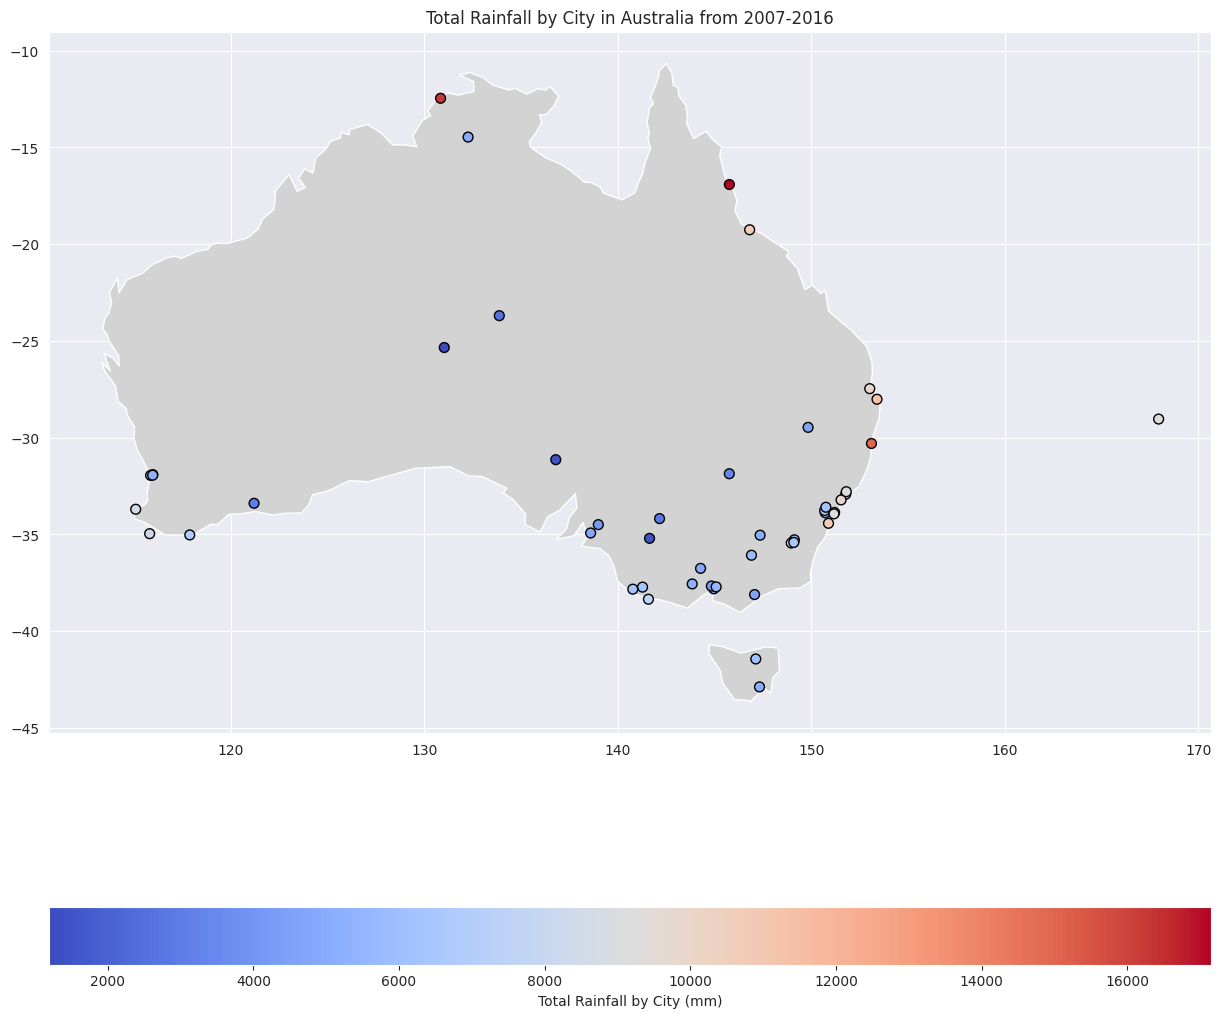

AttributeError: 'DataFrame' object has no attribute 'aply'

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

# Load the dataset
data = rains

# Drop rows with missing 'Rainfall' and 'Location' values
data_clean = data.dropna(subset=['Rainfall', 'Location'])

# Group by city (Location) and get total rainfall for each city
rainfall_by_city = data_clean.groupby('Location')['Rainfall'].sum().reset_index()

# Get unique city locations (we assume that each city is a point)
# For simplicity, let's use a hypothetical dataset for city coordinates
# For real-world use, you'd replace this with actual coordinates or a geospatial file

# Hypothetical city coordinates (latitude, longitude)
# Coordinates for the cities (replace with actual coordinates or use a geocoding API)
city_coords = {
    'Albury': (-36.0785, 146.9136),
    'BadgerysCreek': (-33.8813, 150.7282),
    'Cobar': (-31.8667, 145.7667),
    'CoffsHarbour': (-30.3026, 153.1137),
    'Moree': (-29.4706, 149.8392),
    'Newcastle': (-32.9283, 151.7817),
    'NorahHead': (-33.2202, 151.5433),
    'NorfolkIsland': (-29.0408, 167.9541),
    'Penrith': (-33.7675, 150.6931),
    'Richmond': (-33.5982, 150.7581),
    'Sydney': (-33.8688, 151.2093),
    'SydneyAirport': (-33.9399, 151.1753),
    'WaggaWagga': (-35.0433, 147.3587),
    'Williamtown': (-32.7951, 151.8118),
    'Wollongong': (-34.4278, 150.8931),
    'Canberra': (-35.2809, 149.1300),
    'Tuggeranong': (-35.4167, 149.1000),
    'MountGinini': (-35.4471, 148.9685),
    'Ballarat': (-37.5622, 143.8503),
    'Bendigo': (-36.7582, 144.2814),
    'Sale': (-38.1100, 147.0737),
    'MelbourneAirport': (-37.6692, 144.8411),
    'Melbourne': (-37.8136, 144.9631),
    'Mildura': (-34.1850, 142.1625),
    'Nhil': (-35.2060, 141.6450),
    'Portland': (-38.3516, 141.5878),
    'Watsonia': (-37.7139, 145.0875),
    'Dartmoor': (-37.7251, 141.2843),
    'Brisbane': (-27.4698, 153.0251),
    'Cairns': (-16.9203, 145.7710),
    'GoldCoast': (-28.0167, 153.4000),
    'Townsville': (-19.2589, 146.8183),
    'Adelaide': (-34.9285, 138.6007),
    'MountGambier': (-37.8321, 140.7807),
    'Nuriootpa': (-34.4973, 138.9966),
    'Woomera': (-31.1395, 136.7984),
    'Albany': (-35.0285, 117.8837),
    'Witchcliffe': (-33.7015, 115.0911),
    'PearceRAAF': (-31.9131, 115.9741),
    'PerthAirport': (-31.9402, 115.9676),
    'Perth': (-31.9505, 115.8605),
    'SalmonGums': (-33.3937, 121.2060),
    'Walpole': (-34.9639, 115.8106),
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4391, 147.1349),
    'AliceSprings': (-23.6980, 133.8807),
    'Darwin': (-12.4634, 130.8456),
    'Katherine': (-14.4686, 132.2678),
    'Uluru': (-25.3444, 131.0369)
}

# Create GeoDataFrame with city coordinates and rainfall data
rainfall_by_city['Coordinates'] = rainfall_by_city['Location'].map(city_coords)
rainfall_by_city['geometry'] = rainfall_by_city['Coordinates'].apply(lambda x: Point(x[1], x[0]))
gdf = gpd.GeoDataFrame(rainfall_by_city, geometry='geometry')

# Load a map of Australia
world = gpd.read_file('../data/110m_cultural/ne_110m_admin_0_countries.shp')
australia = world[world['NAME'] == "Australia"]

# Plot the rainfall by city on a map
fig, ax = plt.subplots(figsize=(15, 15))
australia.plot(ax=ax, color='lightgrey')

# Plot cities as points on the map, color-coded by total rainfall
gdf.plot(ax=ax, markersize=50, column='Rainfall', cmap='coolwarm', legend=True,
         legend_kwds={'label': "Total Rainfall by City (mm)", 'orientation': "horizontal"},
         edgecolor='black',  # Set marker edges to black for contrast
         linewidth=1  # Increase edge width for "bold" appearance)
         )
# Set title and show plot
plt.title('Total Rainfall by City in Australia from 2007-2016')
plt.show()



<Axes: >

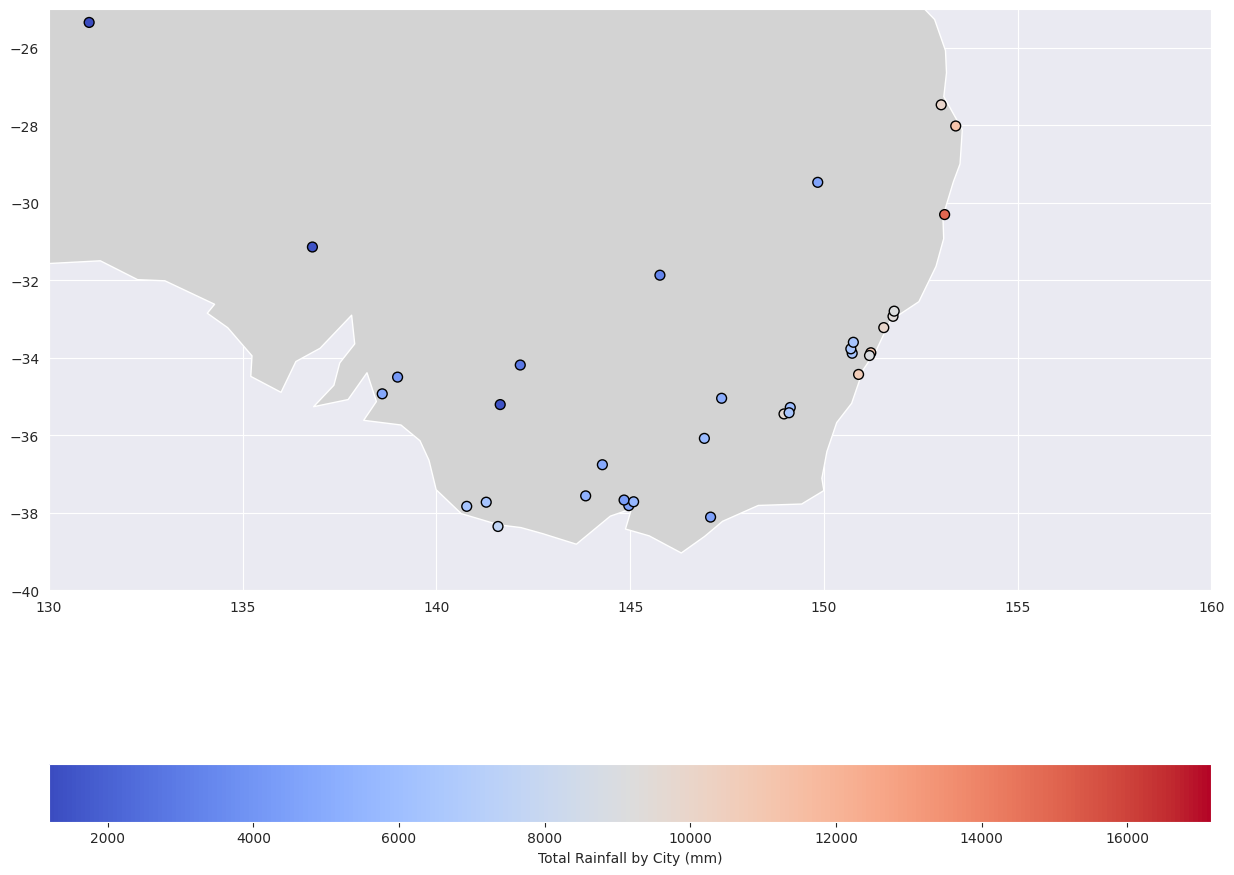

In [12]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_xlim(130, 160)
ax.set_ylim(-40, -25)
australia.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=50, column='Rainfall', cmap='coolwarm', legend=True,
         legend_kwds={'label': "Total Rainfall by City (mm)", 'orientation': "horizontal"},
         edgecolor='black',
         linewidth=1)

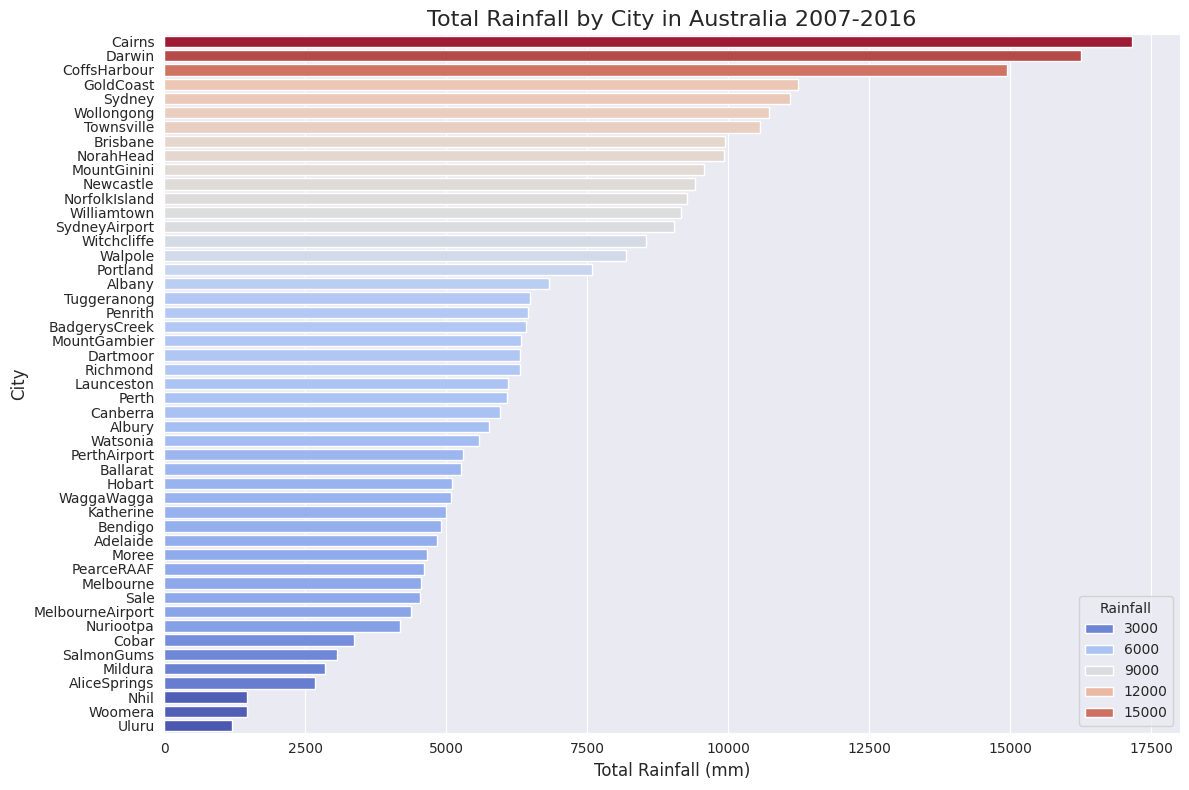

In [6]:
data_clean = rains.dropna(subset=['Rainfall', 'Location'])

# Group by city (Location) and sum rainfall
rainfall_by_city = data_clean.groupby('Location')['Rainfall'].sum().reset_index()

# Sort by total rainfall for better visualization
rainfall_by_city = rainfall_by_city.sort_values('Rainfall', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Rainfall',
    y='Location',
    data=rainfall_by_city,
    palette='coolwarm',
    hue='Rainfall',
)

# Add labels and title
plt.xlabel('Total Rainfall (mm)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Total Rainfall by City in Australia 2007-2016', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_1382044/2439412042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['year'] = data_clean['Date'].dt.year


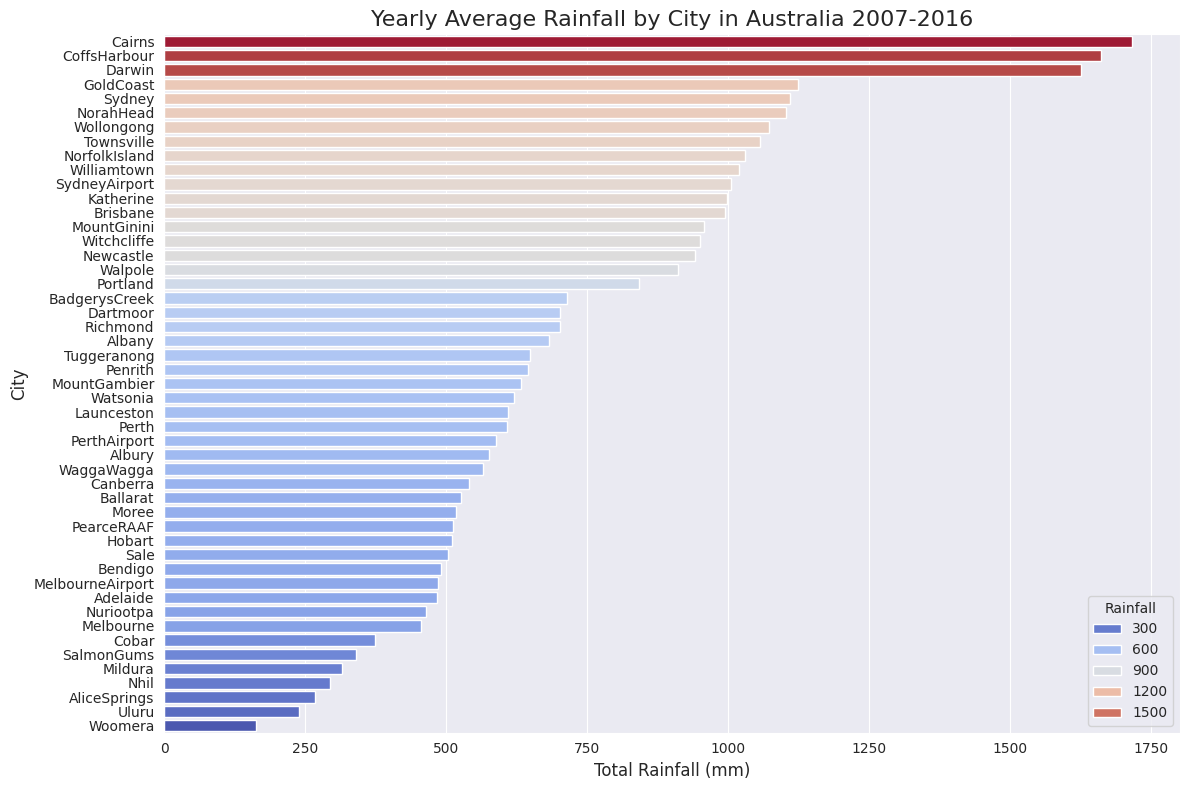

In [7]:
data_clean['year'] = data_clean['Date'].dt.year
group_by_loc_year = data_clean.groupby(['Location', 'year'])['Rainfall'].sum().groupby('Location').mean().reset_index()

rainfall_by_city = group_by_loc_year.sort_values('Rainfall', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Rainfall',
    y='Location',
    data=rainfall_by_city,
    palette='coolwarm',
    hue='Rainfall',
)

# Add labels and title
plt.xlabel('Total Rainfall (mm)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Yearly Average Rainfall by City in Australia 2007-2016', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()